In [1]:
# Cancer Dataset
# import neccessary libraries and load dataset

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/nickkas/python_ml_ect_/master/cancer.csv')

In [2]:
# Explore data, clean the data, drop values/features that are not needed.... all of that
# I dropped 'id' and 'Unnamed: 32' because these two features explained nothing and were not needed
df.info()

df.isna().sum()

df.nunique()

print(df.dtypes)
df.shape

df = df.drop(['Unnamed: 32','id'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

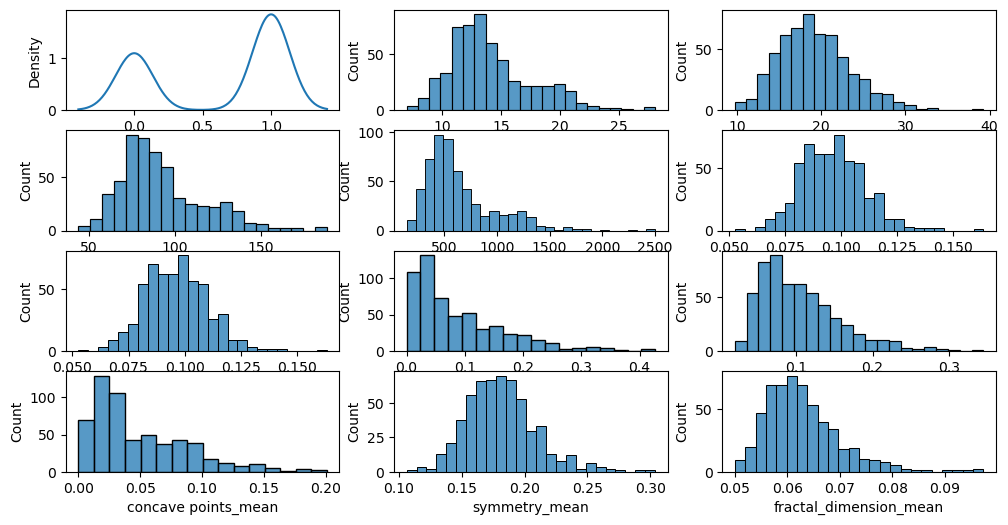

In [3]:
# using pandas 'get_dummies', I turned 'diagnosis' into a dummy variable because there were two categories for the feature
# and both of them were strings
# Also, Histograms and desc statistics on various features from the datset


df['diagnosis'] = pd.get_dummies(df.diagnosis,prefix='diagnosis').iloc[:,0:1]

def subplots(df):
    his,ax1 = plt.subplots(4,3,figsize=(12,6))
    sns.kdeplot(df,x='diagnosis',ax=ax1[0,0])
    sns.histplot(df,x='radius_mean',ax=ax1[0,1])
    sns.histplot(df,x='texture_mean',ax=ax1[0,2])
    sns.histplot(df,x='perimeter_mean',ax=ax1[1,0])
    sns.histplot(df,x='area_mean',ax=ax1[1,1])
    sns.histplot(df,x='smoothness_mean',ax=ax1[1,2])
    sns.histplot(df,x='smoothness_mean',ax=ax1[2,0])
    sns.histplot(df,x='concavity_mean',ax=ax1[2,1])
    sns.histplot(df,x='compactness_mean',ax=ax1[2,2])   
    sns.histplot(df,x='concave points_mean',ax=ax1[3,0])
    sns.histplot(df,x='symmetry_mean',ax=ax1[3,1])
    sns.histplot(df,x='fractal_dimension_mean',ax=ax1[3,2])
    plt.show()



subplots(df)

In [4]:
# Diagnosis is the dependent variable which I turned into a dummy, the value_counts will be normalized for y(dependent variable)
# And, in processing the data, standard scaler will be used as well with a test/train split

X = df.drop('diagnosis',axis=1)
y = df[['diagnosis']]

y.value_counts(normalize=True)





from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [5]:
# Models used for evaluating the data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


clf = LogisticRegression().fit(X_train_scaled,y_train)
pred_clf = clf.predict(X_test_scaled)
pred_prob_clf = clf.predict_proba(X_test_scaled)[::,1]


tree = DecisionTreeClassifier().fit(X_train_scaled,y_train)
tree_pred = tree.predict(X_test_scaled)
tree_pred_prob = tree.predict_proba(X_test_scaled)[::,1]

rfc = RandomForestClassifier().fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
rfc_pred_prob = rfc.predict_proba(X_test_scaled)[::,1]


nb = GaussianNB().fit(X_train_scaled,y_train)
nb_pred = nb.predict(X_test_scaled)
nb_pred_prob = nb.predict_proba(X_test_scaled)[::,1]


GBC = GradientBoostingClassifier().fit(X_train_scaled, y_train)
GBC_pred = GBC.predict(X_test_scaled)
GBC_pred_prob = GBC.predict_proba(X_test_scaled)[::,1]

In [6]:
# results
from sklearn.metrics import roc_auc_score,accuracy_score


def evaluate_model(model_name,y_true,y_pred,y_pred_prob):
    acc = accuracy_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred_prob)
    print(f'{model_name} - Accuracy: {acc * 100:.2f}%, ROC-AUC: {roc * 100:.2f}%')

evaluate_model('Logistic Regression', y_test,pred_clf,pred_prob_clf)
evaluate_model('Random Forest', y_test,rfc_pred,rfc_pred_prob)
evaluate_model('Naive Bayes', y_test,nb_pred,nb_pred_prob)
evaluate_model('Gradient Boosting',y_test,GBC_pred,GBC_pred_prob)
evaluate_model('Decision Trees', y_test,tree_pred, tree_pred_prob)

Logistic Regression - Accuracy: 97.37%, ROC-AUC: 99.74%
Random Forest - Accuracy: 95.61%, ROC-AUC: 99.53%
Naive Bayes - Accuracy: 96.49%, ROC-AUC: 99.74%
Gradient Boosting - Accuracy: 95.61%, ROC-AUC: 99.44%
Decision Trees - Accuracy: 92.98%, ROC-AUC: 92.53%
